# 监督学习

### 线性回归 Linear Regression
### 逻辑回归 Logistic Regression
### Softmax, Cross-Entropy
### 正则化 Regularization
### 交叉验证 Cross-Validation

### 线性回归
#### 预测出 y 是一个实数 ————> 回归 ————> 预测
#### 预测出 y 是一个向量 ————> 概率 ————> 分类

平方误差损失函数 L2-distance: $$loss(\theta) = \frac{1}{2}\sum_{}(f_\theta(x^i) - y^i)^2 = \frac{1}{2}\sum_{}(\theta^T - y^i)^2$$

绝对值损失函数 L1-distance:$$loss(\theta) = \frac{1}{2}\sum_{}|f_\theta(x^i) - y^i| = \frac{1}{2}\sum_{}|\theta^T - y^i|$$

i=1,$\theta$表示参数的集合：

$$f_\theta(x^i) = w_1x_1 + w_2x_2 + ... + w_nx_n$$

$$loss(\theta) = \frac{1}{2}\sum_{}(w_1x_1 + w_2x_2 + ... + w_nx_n + b - y_i)$$

如果期望函数比较稳定，那么就用均方误差损失函数；

如果期望函数总体的误差比较小的话，那其实用绝对值损失函数也可以。

奥卡姆剃刀原理：除非有必要，否则不要增加复杂度。

$\nabla$ 对于不同维度的向量分别求偏导，$J(\theta)$表示当年自动化控制的人做的一个损失函数

$$\nabla_{\theta}J(\theta) = \begin{bmatrix}
    \frac{{\alpha}J(\theta)}{\alpha\theta_1} \\
    \frac{{\alpha}J(\theta)}{\alpha\theta_2} \\
    ...\\
    \frac{{\alpha}J(\theta)}{\alpha\theta_n} \\
\end{bmatrix}$$

### 逻辑回归

推荐系统：即是逻辑回归，输出的是一个实数，超过某个阈值就推，不超过某个阈值就不推。

## 面试题

逻辑回归的损失函数交叉熵损失函数：

$$J(\theta) = -\sum_{i}{(y^i\log{h_\theta{(x^i)}} + (1 - y^i)\log{(1 - h_\theta{(x^i)})})}$$

if y = 1:$$Cost(h_\theta{x}, Y(actual)) = -\log{h_\theta{(x)}}$$

if y = 0:$$Cost(h_\theta{x}, Y(actual)) = -\log{(1 - h_\theta{(x)})}$$

类似于：$$y = \frac{1}{1 - e^{-x}}$$

损失函数：loss、Cost、J

## Softmax & cross entropy

$$softmax(\vec(x)) = \frac{e^{x_i}}{\sum{e^{x_j}}}$$

假设我们现在有一个向量，来描述某位同事的最近情况

In [6]:
person1 = [8.5, 34, 123, 54]

In [ ]:
心情 = ['开心', '难过', '平静', '惊喜', '迷离']

In [10]:
import numpy as np

In [19]:
weights = np.random.randn(4, 5)

## wx + b

In [20]:
bias = np.random.random()

In [25]:
logits = np.dot(person1, weights) + bias

In [27]:
logits

array([ -77.44093912,  263.3501152 ,  -97.3068292 ,  314.87639159,
       -253.95141974])

In [28]:
def softmax(x):
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [29]:
softmax(logits)

array([4.15669462e-171, 4.19201176e-023, 9.79719341e-180, 1.00000000e+000,
       9.14577239e-248])

## Cross-Entropy

In [ ]:
person1 = [85, 34, 34, 54]
y_about_person = [0, 1, 0, 0, 0]

In [30]:
weights

array([[-1.37226279, -0.76694237,  1.06200648,  1.49825513, -0.67909456],
       [-1.36881314, -0.49455475,  1.55688801, -0.37777079,  1.22967736],
       [ 0.50919354,  1.86225064, -1.08151389,  1.618931  , -1.87474601],
       [-1.53294063,  1.05030052, -0.50282959,  2.12862938, -1.11676515]])

In [31]:
bias

0.9109303046322875

## 交叉熵损失函数

In [1]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """
    计算二分类交叉熵损失函数
    :param y_true: 真实标签，取值为 0 或 1
    :param y_pred: 预测概率值，取值为 0-1 之间的实数
    :return: 交叉熵损失函数值
    """
    epsilon = 1e-15  # 避免出现 log(0) 的情况
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

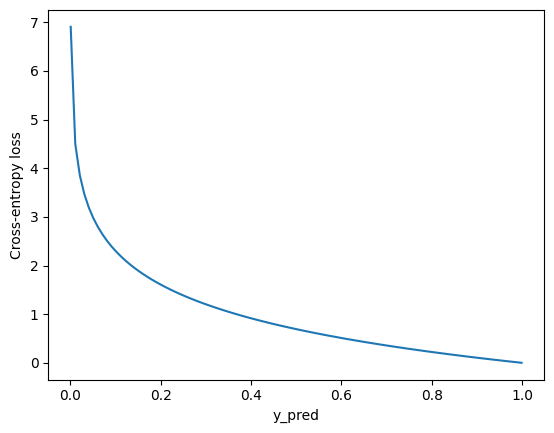

In [2]:
import matplotlib.pyplot as plt

y_true = 1
y_pred = np.linspace(0.001, 0.999, 100)
loss = [cross_entropy_loss(y_true, p) for p in y_pred]

plt.plot(y_pred, loss)
plt.xlabel('y_pred')
plt.ylabel('Cross-entropy loss')
plt.show()

In [3]:
import numpy as np

def log_loss(y_true, y_pred, epsilon=1e-15):
    """
    计算二分类对数损失函数
    :param y_true: 真实标签，取值为 0 或 1
    :param y_pred: 预测概率值，取值为 0-1 之间的实数
    :param epsilon: 避免出现 log(0) 的情况
    :return: 对数损失函数值
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

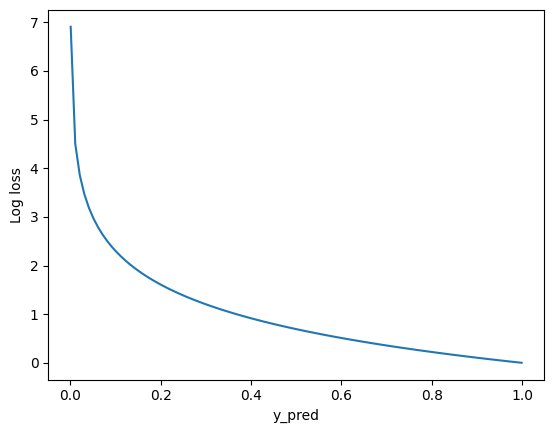

In [4]:
import matplotlib.pyplot as plt

y_true = 1
y_pred = np.linspace(0.001, 0.999, 100)
loss = [log_loss(y_true, p) for p in y_pred]

plt.plot(y_pred, loss)
plt.xlabel('y_pred')
plt.ylabel('Log loss')
plt.show()

In [5]:
from sklearn.metrics import roc_auc_score

y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]
auc = roc_auc_score(y_true, y_scores)
print("AUC:", auc)

AUC: 0.75
